# Correlation and Segmentation Notebook

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
df = pd.read_csv("player_rank.csv")
df.head(100)

,name,account_id,rank,games,kills,wins,average_damage,win_ratio,season,game_type,season_length
0,Oilersfan74,account.166d81fc85534147b1b4bf2e537d5077,1,2463,2348,34,116,0.013804,xbox-01,solo,30
1,ALPHA NANOC,account.f396a20e56a94b4ba82b5f4eebd54861,1,2075,10399,429,526,0.206747,xbox-02,solo,173
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,2,1755,4955,231,327,0.131624,xbox-02,solo,173
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,2,1136,4902,171,527,0.150528,xbox-01,solo,30
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,3,1209,3424,137,323,0.113317,xbox-01,solo,30
...,...,...,...,...,...,...,...,...,...,...,...
95,MORICAN69,account.4dbc5ce83ab7470397e9ac2b9248a5f3,48,2124,2054,7,107,0.003296,xbox-01,solo,30
96,bwilk13,account.9c97c9e05b7d46d1813cd2e1244cedad,49,1110,1065,12,119,0.010811,xbox-01,solo,30
97,PicanteBike2052,account.49ee09c0f1564302991380ddfd603b07,49,1305,1518,10,134,0.007663,xbox-02,solo,173
98,AhkmedJabar II,account.22886c4918f547d3848d10b2ce6108cb,50,1223,1182,8,118,0.006541,xbox-01,solo,30


In [217]:
def f(row):
    if row['kills'] < 2500:
        val = "low <2500"
    elif row['kills'] < 5000:
        val = "mid <5k"
    elif row['kills'] < 7500:
        val = "high <7.5k"
    elif row['kills'] < 10000:
        val = "extreme <10k"
    else:
        val = "legendary 10k+"
    return val
df['kill_score'] = df.apply(f, axis=1)
df

,name,account_id,rank,games,kills,wins,average_damage,win_ratio,season,game_type,season_length,kill_score
0,Oilersfan74,account.166d81fc85534147b1b4bf2e537d5077,1,2463,2348,34,116,0.013804,xbox-01,solo,30,low <2500
1,ALPHA NANOC,account.f396a20e56a94b4ba82b5f4eebd54861,1,2075,10399,429,526,0.206747,xbox-02,solo,173,legendary 10k+
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,2,1755,4955,231,327,0.131624,xbox-02,solo,173,mid <5k
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,2,1136,4902,171,527,0.150528,xbox-01,solo,30,mid <5k
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,3,1209,3424,137,323,0.113317,xbox-01,solo,30,mid <5k
...,...,...,...,...,...,...,...,...,...,...,...,...
639,FredyMercsTeeth,account.4f81907a8ea44ed88dcd6456e36bbda5,496,916,681,8,90,0.008734,xbox-01,solo,30,low <2500
640,DMaintenanceMan,account.1fa4256076144155b45f674956af82dc,497,561,514,12,109,0.021390,xbox-01,solo,30,low <2500
641,celsorico,account.08c7062c36774f8abbfb60f6646113ba,498,887,475,6,71,0.006764,xbox-01,solo,30,low <2500
642,JustPhilly69,account.931cf2e9ba90427b9a1662e7522ba1fa,499,565,460,27,102,0.047788,xbox-01,solo,30,low <2500


In [218]:
df.shape

(644, 12)

In [219]:
df.describe()

,rank,games,kills,wins,average_damage,win_ratio,season_length
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,210.698758,1004.757764,1499.953416,35.781056,188.708075,0.043936,61.975155
std,148.647378,395.400453,1155.703808,45.020820,124.483850,0.057457,59.628497
min,1.000000,321.000000,139.000000,0.000000,20.000000,0.000000,30.000000
25%,81.000000,724.750000,816.250000,9.000000,111.000000,0.008857,30.000000
50%,178.500000,916.000000,1152.500000,17.000000,137.000000,0.020233,30.000000
75%,339.250000,1191.750000,1772.000000,49.000000,246.750000,0.060615,30.000000
max,500.000000,3212.000000,10399.000000,429.000000,939.000000,0.398990,173.000000


In [220]:
df.dtypes

name               object
account_id         object
rank                int64
games               int64
kills               int64
wins                int64
average_damage      int64
win_ratio         float64
season             object
game_type          object
season_length       int64
kill_score         object
dtype: object

In [221]:
df.isnull().sum()

name              0
account_id        0
rank              0
games             0
kills             0
wins              0
average_damage    0
win_ratio         0
season            0
game_type         0
season_length     0
kill_score        0
dtype: int64

# Clean Data for Correlation Matrix's

In [222]:
new = df.drop([0,1,8])
new.shape
new

,name,account_id,rank,games,kills,wins,average_damage,win_ratio,season,game_type,season_length,kill_score
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,2,1755,4955,231,327,0.131624,xbox-02,solo,173,mid <5k
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,2,1136,4902,171,527,0.150528,xbox-01,solo,30,mid <5k
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,3,1209,3424,137,323,0.113317,xbox-01,solo,30,mid <5k
5,JonFriendly,account.14731f042cdb45fa8fd4edb5f47ac29e,3,1649,3575,123,238,0.074591,xbox-02,solo,173,mid <5k
6,XreecyX,account.a0af18f8ce5040a6a3b45029e8adea3c,4,1593,8090,316,534,0.198368,xbox-02,solo,173,extreme <10k
...,...,...,...,...,...,...,...,...,...,...,...,...
639,FredyMercsTeeth,account.4f81907a8ea44ed88dcd6456e36bbda5,496,916,681,8,90,0.008734,xbox-01,solo,30,low <2500
640,DMaintenanceMan,account.1fa4256076144155b45f674956af82dc,497,561,514,12,109,0.021390,xbox-01,solo,30,low <2500
641,celsorico,account.08c7062c36774f8abbfb60f6646113ba,498,887,475,6,71,0.006764,xbox-01,solo,30,low <2500
642,JustPhilly69,account.931cf2e9ba90427b9a1662e7522ba1fa,499,565,460,27,102,0.047788,xbox-01,solo,30,low <2500


## Correlation Matrix

In [223]:
new.corr()

,rank,games,kills,wins,average_damage,win_ratio,season_length
rank,1.000000,-0.439149,-0.493527,-0.395808,-0.246810,-0.212034,-0.501446
games,-0.439149,1.000000,0.204886,-0.172013,-0.316621,-0.390690,0.247091
kills,-0.493527,0.204886,1.000000,0.762020,0.774806,0.530559,0.459070
wins,-0.395808,-0.172013,0.762020,1.000000,0.832445,0.893162,0.452942
average_damage,-0.246810,-0.316621,0.774806,0.832445,1.000000,0.850900,0.313797
win_ratio,-0.212034,-0.390690,0.530559,0.893162,0.850900,1.000000,0.312212
season_length,-0.501446,0.247091,0.459070,0.452942,0.313797,0.312212,1.000000


<AxesSubplot:xlabel='wins', ylabel='kill_score'>

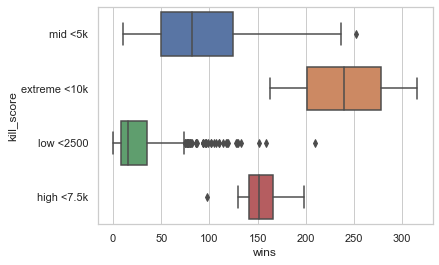

In [248]:
sns.boxplot(x=new['wins'],y=new['kill_score'])


In [225]:
# correlation coefficent using scipy stats
from scipy import stats

stats.pearsonr(new.kills, new.wins)

(0.7620195610563192, 1.0517812701819068e-122)

## Correlation Matrix Heatmap

Text(0.5, 1.0, 'Seaborn')

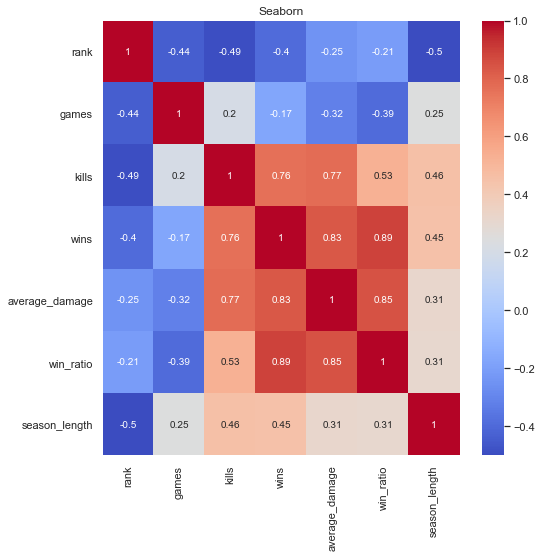

In [226]:
plt.figure(figsize=(8,8))
sns.heatmap(new.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

# PairPlot

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


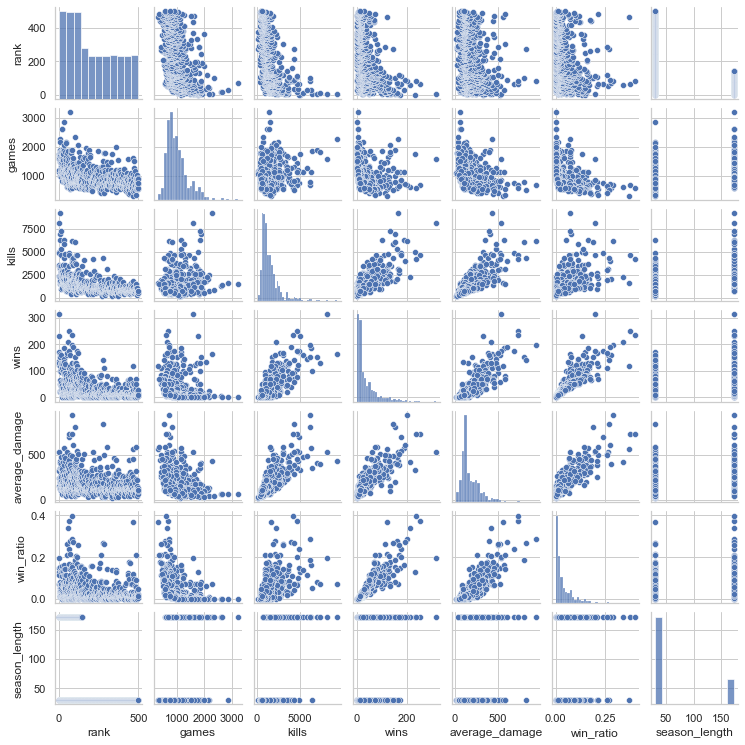

In [227]:
#compare heat matrix and pairplot positive correlations
pubg_pairplot = new.dropna()
sns.pairplot(pubg_pairplot, size=1.5);

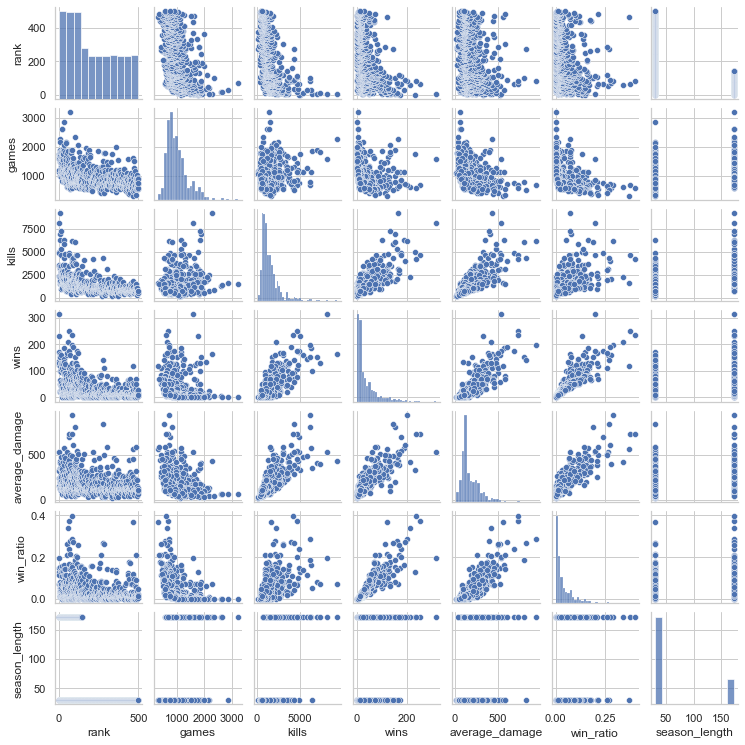

In [228]:
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)


pair_plot = sns.pairplot(pubg_pairplot, height=1.5);
pair_plot.map_lower(corrfunc);
pair_plot.map_upper(corrfunc);

# Distribution Plots for Kills, Games, and Wins

C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tbrid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

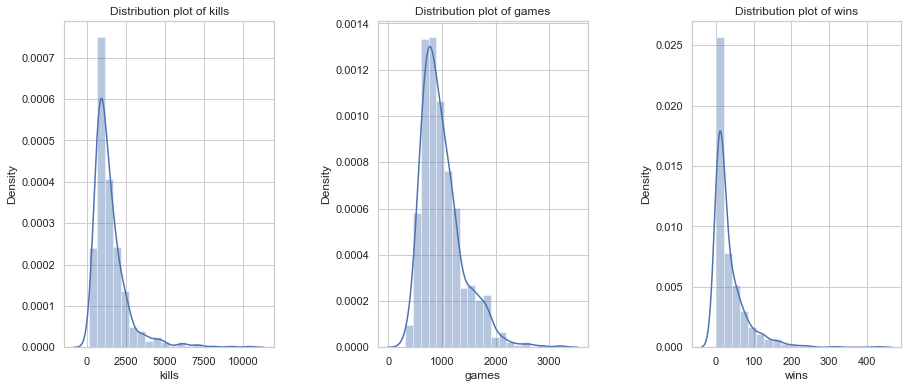

In [229]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['kills', 'games', 'wins']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

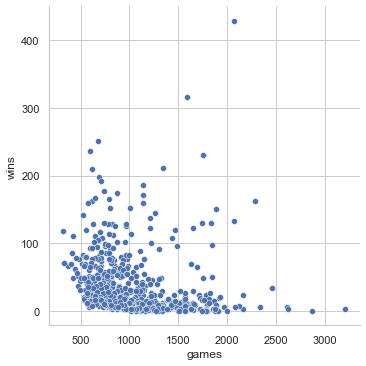

In [230]:
sns.relplot(x='games', y = 'wins', data=df)

# Begin Clustering data to look for player segments

## Elbow Test to look for ideal number of clusters

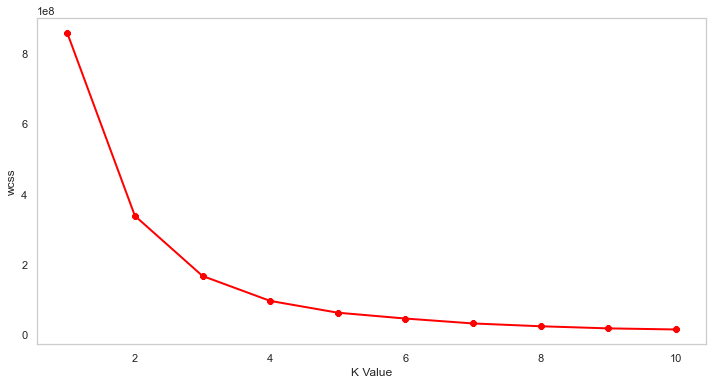

In [231]:
x1 = df.loc[:, ['kills', 'wins']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

## Inspect clusters

In [232]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x1)
print(label)

[2 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 2 0 2 2 2 2 2 2 1 2 1 0 0 2 0 1 2 0 2 2 2
 0 0 2 0 0 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 1 1 2 2 0 2 0 0 1 2 2 2 2 0 2
 0 1 2 0 0 2 2 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 2 2 0 2 2 2 0 2 0 2 0 1 0 0 0 2 1 2 0 2 2 0 2 0 0 2 2 2 0 2 2 2 2
 2 2 0 0 2 0 0 2 0 2 2 0 1 2 2 2 2 1 0 0 2 0 2 2 0 2 2 2 1 0 0 2 0 2 2 2 2
 0 0 0 0 2 2 0 0 0 0 2 2 0 0 2 1 2 2 0 0 0 0 2 2 2 2 0 2 2 2 0 0 1 0 0 2 2
 0 1 0 0 2 0 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 0 0 2 2
 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 0 0
 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 

## Check Centroids

In [233]:
print(kmeans.cluster_centers_)


[[ 964.96659243   18.55679287]
 [5712.5         167.07692308]
 [2273.22485207   61.34319527]]


## Wins and Kills Cluster

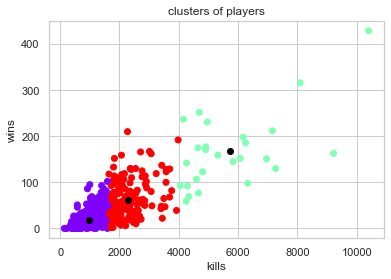

In [234]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("kills")
plt.ylabel("wins")
plt.show()

## Rank and Win Ratio Cluster

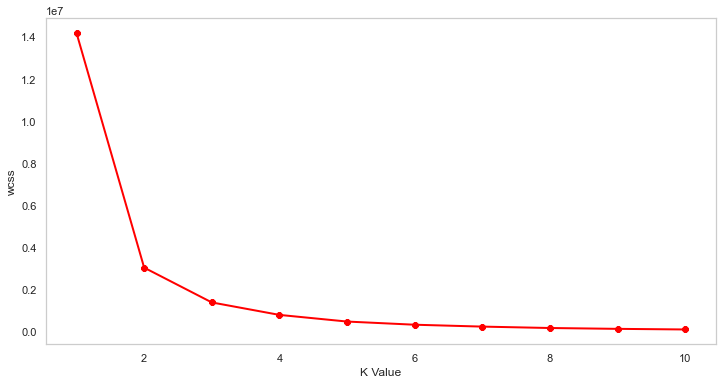

In [235]:
x2 = df.loc[:, ['rank', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [236]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(x2)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [237]:
print(kmeans.cluster_centers_)

[[1.00357143e+02 5.34346377e-02]
 [3.67500000e+02 3.04369964e-02]]


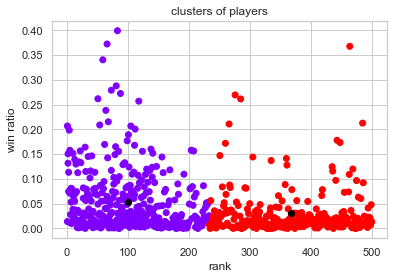

In [238]:
plt.scatter(x2[:,0], x2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("clusters of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Average Damage and Win Ratio Segmentation


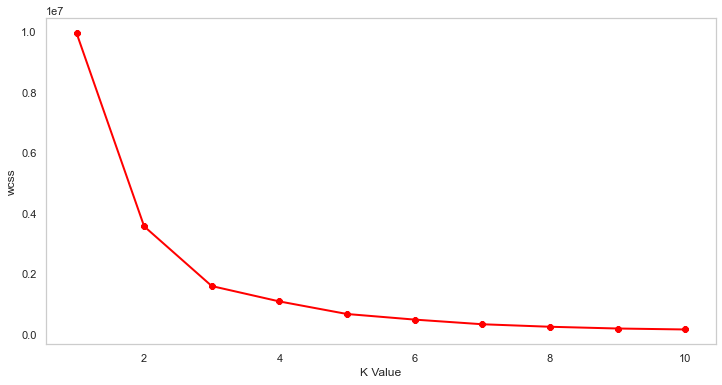

In [239]:
x3 = df.loc[:, ['average_damage', 'win_ratio']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [240]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x3)
print(label)

[1 2 0 2 0 0 2 1 2 2 1 0 0 0 2 1 1 1 0 0 0 0 0 1 2 0 2 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 2 1 1 1 1 1 1 1 0 0 1 1 0 1 1 2 2 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 2 0 0 1 0 2 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 2 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 2 1 1 0 1 0 2 1 0 1 2 1 0 1 0 2 0 1 1 2 1 1 1 1 1 0 0 1 2 0 1 0
 1 0 0 1 0 0 1 1 1 0 2 1 2 0 0 1 0 2 1 1 0 1 0 0 1 1 0 2 0 1 1 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 1 1 2 2 0 0 1 1 1 1 0 0 2 0 1 0 0 0 1 1 2 0 0 0 0
 1 2 1 1 0 1 1 1 1 1 1 0 2 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 2 0 1 1 1 1
 1 1 1 0 0 2 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1
 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 2 1 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 0 1 2 0 1 

In [241]:
print(kmeans.cluster_centers_)

[[2.69005319e+02 7.44520981e-02]
 [1.16160194e+02 1.52166215e-02]
 [5.24931818e+02 1.82461173e-01]]


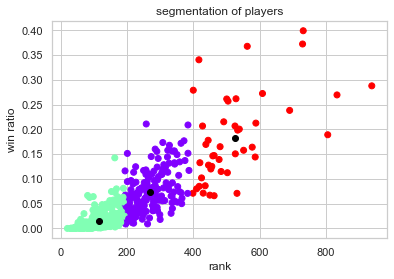

In [242]:
plt.scatter(x3[:,0], x3[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("segmentation of players")
plt.xlabel("rank")
plt.ylabel("win ratio")
plt.show()

## Further Segmentation Analysis

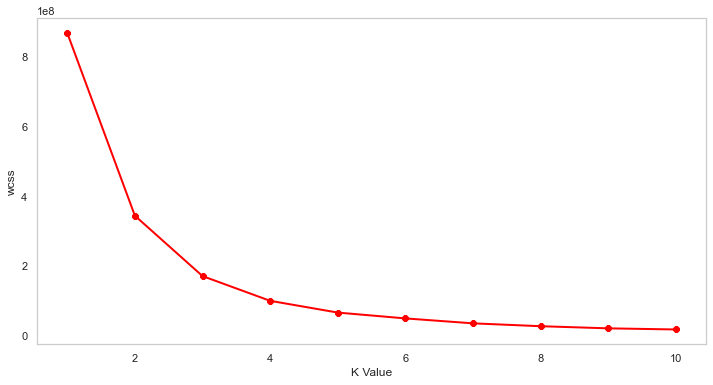

In [243]:
x4 = df.loc[:, ['average_damage', 'win_ratio', 'kills']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()

In [244]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x4)
print(label)

[1 2 2 2 1 1 2 1 2 2 1 1 2 1 2 1 1 0 1 1 1 1 1 1 2 1 2 0 0 1 0 2 1 0 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 2 2 1 1 0 1 0 0 2 1 1 1 1 0 1
 0 2 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 2 0 0 0 1 2 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 0 1 0 1 1 0 2 1 1 1 1 2 0 0 1 0 1 1 0 1 1 2 2 0 0 1 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 2 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 2 0 0 1 1
 0 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 

In [245]:
print(kmeans.cluster_centers_)

[[1.34020362e+02 2.52756639e-02 9.54866516e+02]
 [2.73554286e+02 7.32348211e-02 2.23667429e+03]
 [5.34037037e+02 1.59503592e-01 5.64818519e+03]]


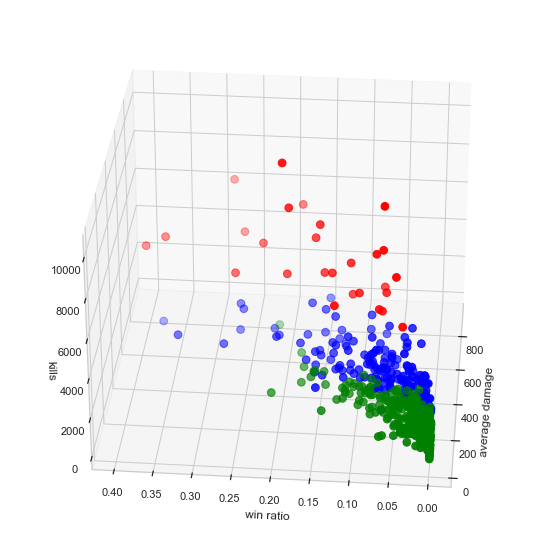

In [246]:
clusters = kmeans.fit_predict(x4)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.average_damage[df.label == 0],df["win_ratio"][df.label == 0], df["kills"][df.label == 0], c="blue", s=60)
ax.scatter(df.average_damage[df.label == 1],df["win_ratio"][df.label == 1], df["kills"][df.label == 1], c="red", s=60)
ax.scatter(df.average_damage[df.label == 2],df["win_ratio"][df.label == 2], df["kills"][df.label == 2], c="green", s=60)
ax.view_init(30, 185)


plt.xlabel("average damage")
plt.ylabel("win ratio")
ax.set_zlabel("kills")

plt.show()
